<a href="https://colab.research.google.com/github/PollyBecker/IceCreamSale/blob/main/MachineLearningIceCream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1

### Problema de Negocios
Prever as vendas de sorvete com base na temperatura em graus Celsius.

## Etapa 2

Compreendendo os dados

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.11.0'

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
ice_cream_sale_df = pd.read_csv('/content/SalesData.csv')
ice_cream_sale_df.reset_index(drop = True, inplace = True)

In [4]:
# visualizando meu df
ice_cream_sale_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
# visualizando integridade dos dados
ice_cream_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
# visualizando as métricas estatísticas
ice_cream_sale_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


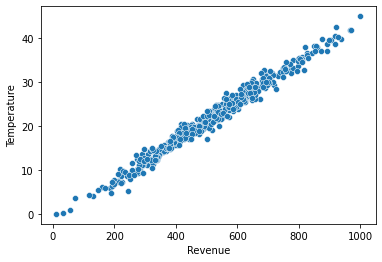

In [9]:
# visualizando gráficamente
# podemos notar que temos o comportamento de uma função linear podemos usar um perceptron 
# mas como não esta tão bem definida a linha podemos adicionar mais camadas para quebrar a linearidade rigida da camada
sns.scatterplot(x=ice_cream_sale_df['Revenue'], y=ice_cream_sale_df['Temperature']);

## Etapa 3
Preparação dos dados- aqui como meus dados estão aparentemente prontos vamos apenas separar o x e y para treinamento

In [10]:
X_train=ice_cream_sale_df['Temperature']
y_train=ice_cream_sale_df['Revenue']

## Etapa 4 
Modelagem

In [31]:
# temos uma saida(units) e uma entrada(input_shape)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
# camadas extras
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [34]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 140160.3750
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 13814.2471
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 3845.3823
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1242.4543
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 793.9532
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 717.8539
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 682.5642
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 687.6799
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 671.6422
Epoch 10/500
16/16 [==============================] - 0s 4ms/step - loss: 687.6000
Epoch 11/500
16/16 [==============================] - 0s 4ms/step - loss: 671.2051
Epoch 12/500
16/16 [==============================] - 0s 3ms/step - loss: 662.6119
Epoch 

In [35]:
epochs_hist.history.keys()

dict_keys(['loss'])

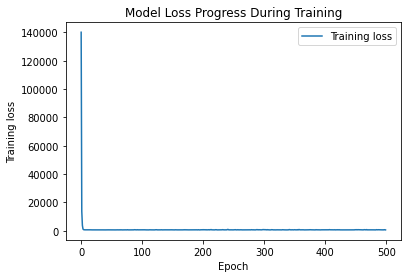

In [36]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [37]:
model.get_weights()

[array([[-0.03760727,  1.486728  , -0.00822382, -0.07329618,  0.05103801,
         -2.9582932 , -0.5737871 , -0.04291408,  1.1288455 , -2.9542563 ]],
       dtype=float32),
 array([ 0.9477855 ,  3.3955338 ,  0.21245979,  1.8139725 , -1.3358369 ,
        -4.5835004 , -2.5178452 , -1.969134  ,  3.0121186 , -4.640056  ],
       dtype=float32),
 array([[-1.4568070e-02],
        [ 1.5498224e+00],
        [-3.1613540e-03],
        [ 2.1827086e-03],
        [-1.2772557e-02],
        [-2.9293861e+00],
        [-6.7358446e-01],
        [-1.1705353e-01],
        [ 1.1622074e+00],
        [-3.1488795e+00]], dtype=float32),
 array([6.639305], dtype=float32)]

In [38]:
temp_c = 5
sale = model.predict([temp_c])
sale

1/1 [==============================] - 0s 260ms/step


array([[155.2532]], dtype=float32)

16/16 [==============================] - 0s 4ms/step


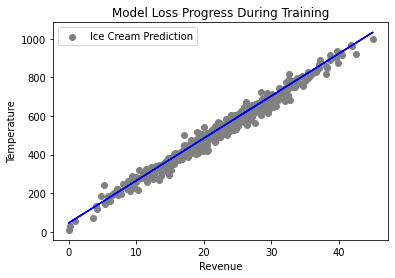

In [40]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title('Model Loss Progress During Training')
plt.xlabel('Revenue')
plt.ylabel('Temperature')
plt.legend(['Ice Cream Prediction']);

## Etapa 5
Verificação do resultado

In [41]:
# sklean precisa receber uma matriz
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
regressor.coef_

array([[21.44362551]])

In [46]:
regressor.intercept_

array([44.83126709])

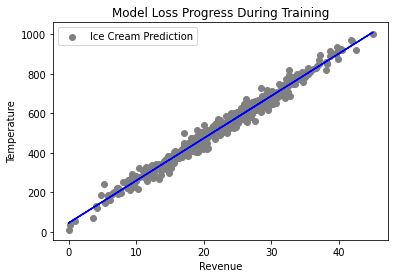

In [47]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Model Loss Progress During Training')
plt.xlabel('Revenue')
plt.ylabel('Temperature')
plt.legend(['Ice Cream Prediction']);

In [50]:
temp_c = 5
sale = regressor.predict([[temp_c]])
sale

array([[152.04939464]])